# Clustering

This week we will be looking at a subfield of unsupervised learning - clustering. This goal is to first have a go at implementing the classic k-means clustering algorithm in python using only numpy, then like previous weeks, you can compare your result to scitkit-learn.

The second (optional) task is to try and use some off-the-shelf clustering algorithms provided by scikit-learn to help cluster some more complicated datasets. All the clustering algorithms implemented by scikit-learn can be found here (https://scikit-learn.org/stable/modules/clustering.html).



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs

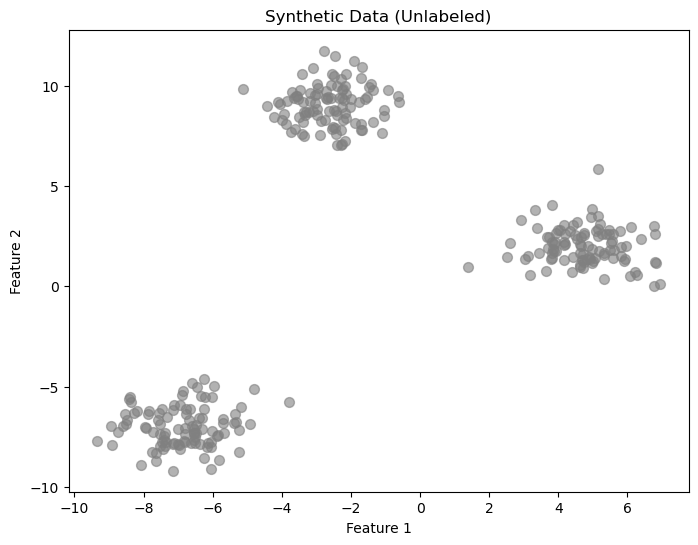

In [2]:
# (Simulated dataset) DO NOT CHANGE THIS CODE
n_samples = 300
n_features = 2  
n_clusters = 3 
random_state = 42  # For reproducibility

# Create the data
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', marker='o', alpha=0.6)
plt.title("Synthetic Data (Unlabeled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Now it's your turn

Try and have a go at implementing k means clustering using the boiler plate code below. 

### Some helper functions

First I've provided you with some helper functions provided by numpy.

In [3]:
# calculates the euclidean norm
a = np.array([1., 0.2, 4.5, -0.6])
print(np.linalg.norm(a))

4.652956049652737


In [4]:
# calculates the minimum index
a = np.array([1., 0.2, 4.5, -0.6])
# output should be 3 since the smallest values -0.6 is in position 3 in the array a
print(np.argmin(a))

3


In [5]:
# calcualtes the mean
a = np.mean([1., 0.2, 4.5, -0.6])
print(np.mean(a))
print(a.mean())

1.2750000000000001
1.2750000000000001


In [6]:
# when you are debugging remember it is always helpful to print out the shape of the array you are dealining with
# this will help you understand which axis to apply operations and if the operations are being applied as intended
a = np.array([1., 0.2, 4.5, -0.6])
b = np.array([[1., 0.9], [0.2, -0.1], [4.5, 2.0], [-0.6, 9.0]])
print(a.shape)
print(b.shape)

(4,)
(4, 2)


In [7]:
X.shape

(300, 2)

In [26]:
def k_means_clustering(X, k, max_iters=100, tolerance=1e-4):
    """
    A simple implementation of K-Means Clustering.
    
    Parameters:
        X (array): Input data.
        k (int): Number of clusters.
        max_iters (int): Maximum iterations for the algorithm.
        tolerance (float): Convergence tolerance.
    
    Returns:
        centroids (array): Final cluster centroids.
        labels (array): Assigned cluster labels for each point.
    """
    # DO NOT CHANGE THE RANDOM SEED
    np.random.seed(42)
    
    # TODO 1: how are you going to randoly initialize your clusters?
    indices = np.random.choice(X.shape[0],size=k, replace=False)
    centroids = X[indices]
    
    print(np.min(X, axis=0))
    
    centroids = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=(k, X.shape[1]))
    
    for i in range(max_iters):
        
        # TODO 2: first step of the algorithm assigning points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # TODO 3: second step of the algorithm compute the new means given the new cluster assignment
        new_centroids = np.array([np.mean(X[labels == cluster], axis=0) for cluster in range(k)])
        
        # LEAVE THIS LINE OF CODE - CHECKS FOR EARLY CONVERGENCE
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# TODO 4: apply your k-means clustering function
k = 3  # Number of clusters
centroids, labels = k_means_clustering(X, k)

[-9.35127169 -9.18203076]


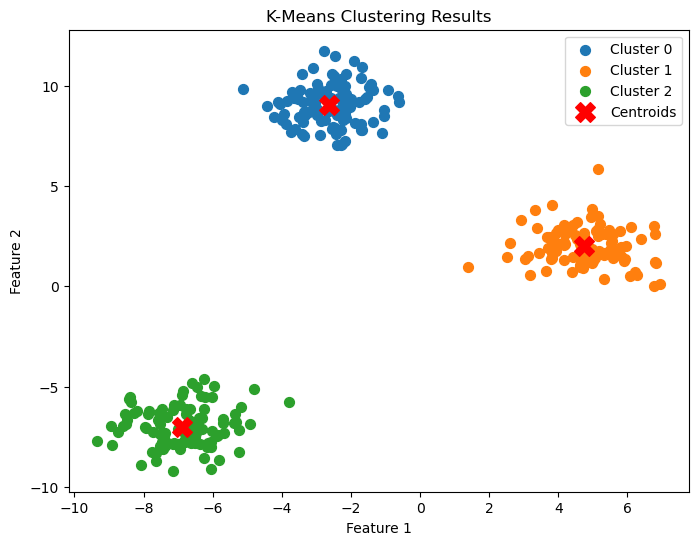

In [27]:
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

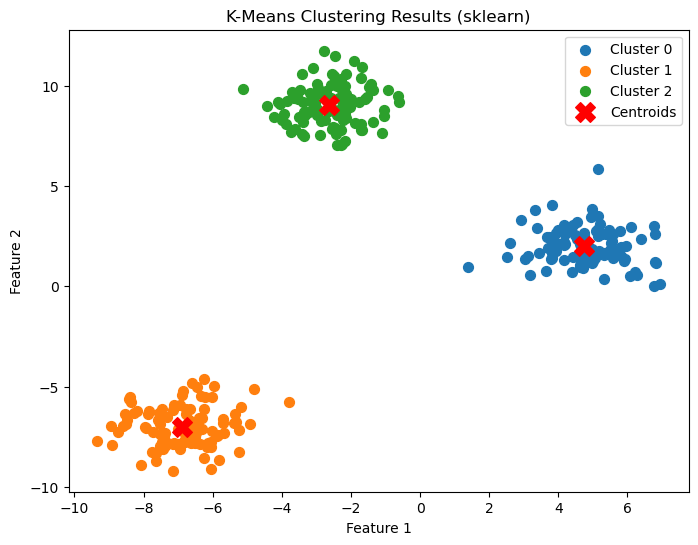

In [28]:
from sklearn.cluster import KMeans

k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
sklearn_labels = kmeans.labels_
sklearn_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X[sklearn_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f'Cluster {cluster}')
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering Results (sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### More complicated datasets

Below I have generated some more complicated datasets that k-means will struggle on, have a go at trying to cluster one of these datasets using some of the off-the-shelf clustering algorithms provided by scikit-learn (https://scikit-learn.org/stable/modules/clustering.html)

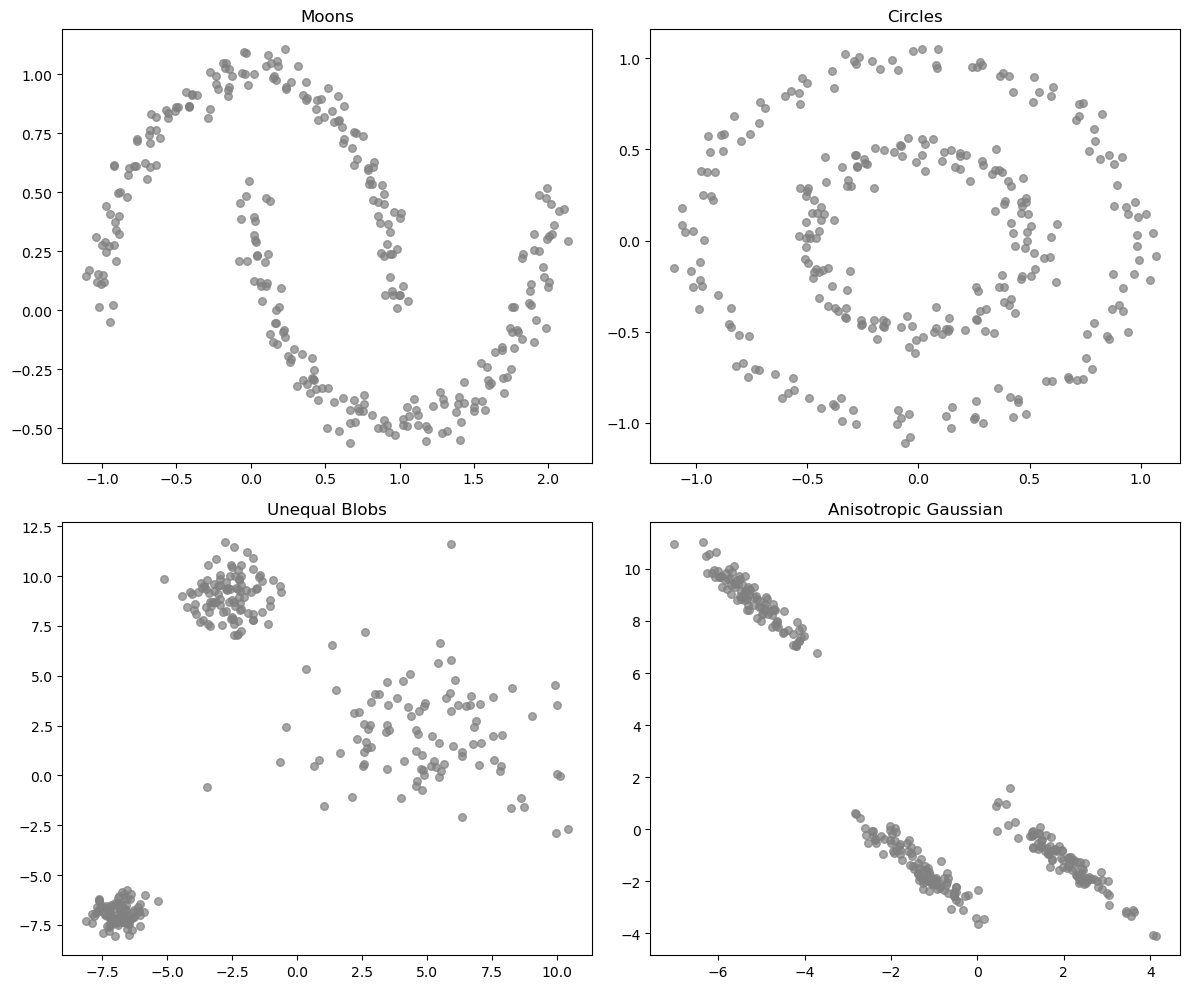

In [29]:
# (Generating datasets) DO NOT CHANGE THIS CODE
datasets = {
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42),
    "Unequal Blobs": make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42),
    "Anisotropic Gaussian": make_blobs(n_samples=300, centers=3, random_state=42)[0],
}

transformation = [[0.6, -0.6], [-0.4, 0.8]]
datasets["Anisotropic Gaussian"] = np.dot(datasets["Anisotropic Gaussian"], transformation)

plt.figure(figsize=(12, 10))
for i, (name, data) in enumerate(datasets.items(), 1):
    X, _ = data if isinstance(data, tuple) else (data, None)
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], s=30, c='gray', alpha=0.7)
    plt.title(name)
plt.tight_layout()
plt.show()


### Now it's your turn

Now it is your go to try and cluster one of these datasets. This is more an exercise in learning how to read through library documentation to find the best method available to you.

In [ ]:
# TODO 1: import your clustering algorithm from scikit-learn

# TODO 2: choose a data set, change "Circles" to the desired dataset
X, _ = datasets["Circles"]

# TODO 3: choose the number of clusters
n_clusters = 2

# TODO 4: instantiate a clustering algorithm from scikit-learn

# TODO 5: get the labels of each data point for the corresponding clustering
labels = ?

# (Plot results) DO NOT CHANGE THIS CODE
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Spectral Clustering on Circles Dataset")
plt.show()